In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today=date.today()
d1=today.strftime("%Y-%m-%d")
end_date=d1
d2=date.today()-timedelta(days=365)
d2=d2.strftime("%Y-%m-%d")
start_date=d2
data=yf.download('GOOG',start=start_date,end=end_date,progress=False)
data["Date"]=data.index
data=data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())
X = data[["Open", "High", "Low", "Volume"]]  # Using these as features
y = data["Close"]

Price                       Date        Open        High         Low  \
Ticker                                  GOOG        GOOG        GOOG   
0      2023-10-31 00:00:00+00:00  126.269997  126.559998  123.925003   
1      2023-11-01 00:00:00+00:00  125.339996  127.739998  124.925003   
2      2023-11-02 00:00:00+00:00  129.559998  130.089996  128.110001   
3      2023-11-03 00:00:00+00:00  129.089996  130.729996  129.009995   
4      2023-11-06 00:00:00+00:00  130.220001  131.559998  129.929993   

Price        Close   Adj Close    Volume  
Ticker        GOOG        GOOG      GOOG  
0       125.300003  124.993042  21123400  
1       127.570000  127.257477  26536600  
2       128.580002  128.264999  24091700  
3       130.369995  130.050613  19517900  
4       131.449997  131.127975  15360400  


In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train_data = data[:split_index]
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Mean Absolute Error (MAE)
mae=mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.6420904407773461
Mean Squared Error (MSE): 0.6109717974859378
Root Mean Squared Error (RMSE): 0.7816468495976542
R-squared (R²): 0.9743370421054288


In [ ]:
train_data = data[["Date", "Close"]]
print(data)

Price                       Date        Open        High         Low  \
Ticker                                  GOOG        GOOG        GOOG   
0      2023-10-31 00:00:00+00:00  126.269997  126.559998  123.925003   
1      2023-11-01 00:00:00+00:00  125.339996  127.739998  124.925003   
2      2023-11-02 00:00:00+00:00  129.559998  130.089996  128.110001   
3      2023-11-03 00:00:00+00:00  129.089996  130.729996  129.009995   
4      2023-11-06 00:00:00+00:00  130.220001  131.559998  129.929993   
..                           ...         ...         ...         ...   
246    2024-10-23 00:00:00+00:00  166.429993  167.600006  163.632996   
247    2024-10-24 00:00:00+00:00  164.589996  165.050003  162.770004   
248    2024-10-25 00:00:00+00:00  165.365005  167.399994  165.229996   
249    2024-10-28 00:00:00+00:00  170.589996  170.606003  165.789993   
250    2024-10-29 00:00:00+00:00  169.384995  171.860001  168.660004   

Price        Close   Adj Close    Volume  
Ticker        GOOG  

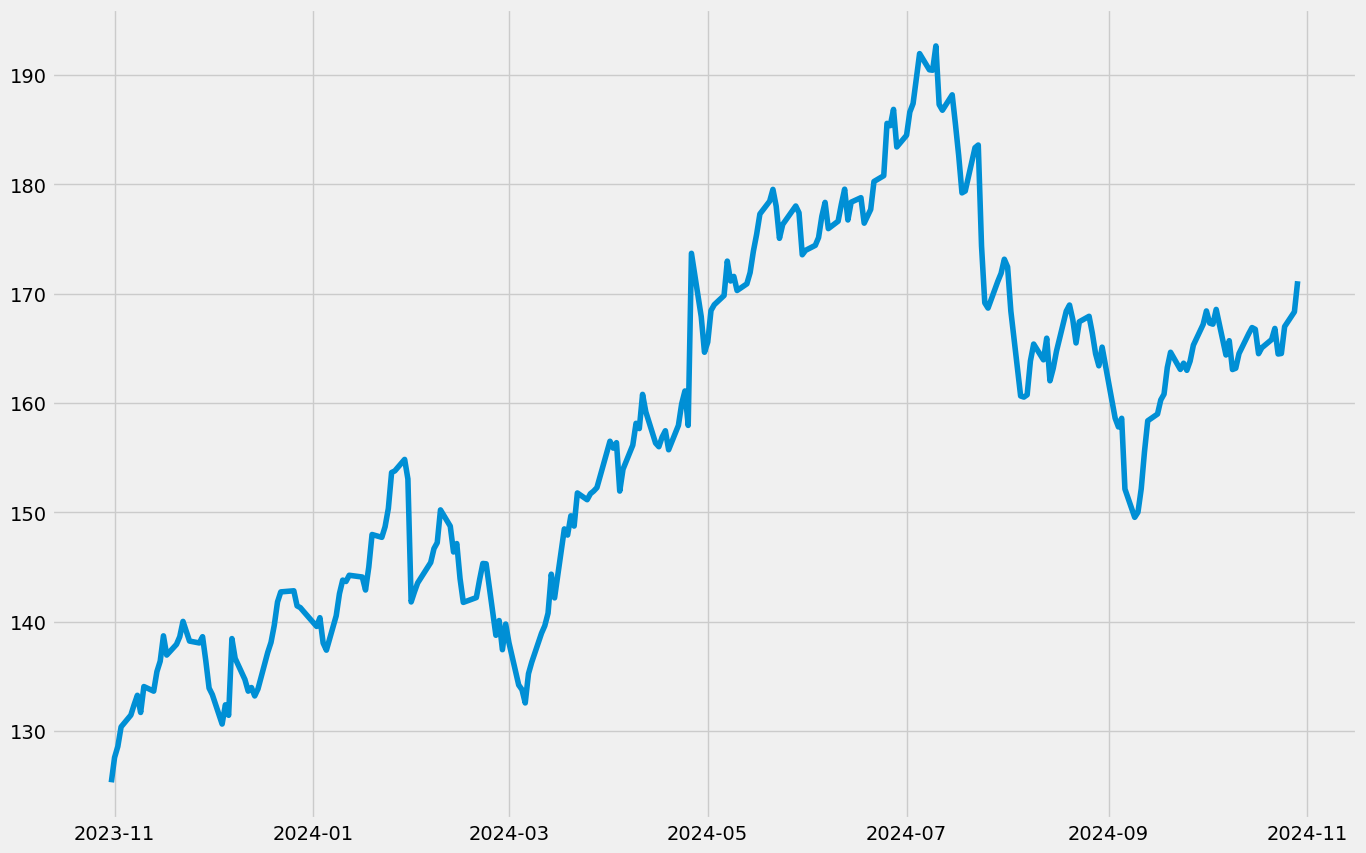

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(train_data["Date"], train_data["Close"])

<Figure size 640x480 with 0 Axes>

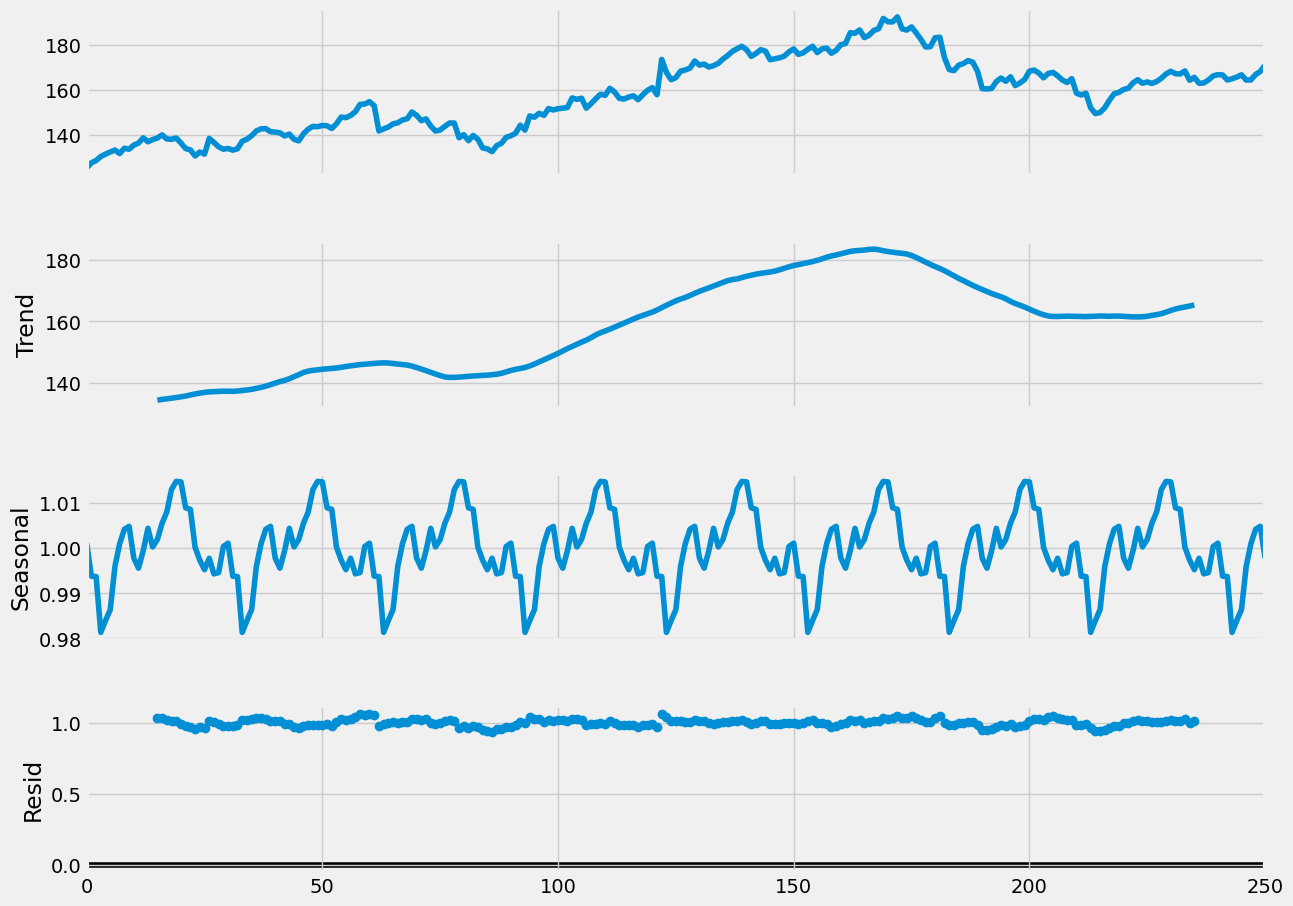

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_data["Close"],model='multiplicative',period= 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

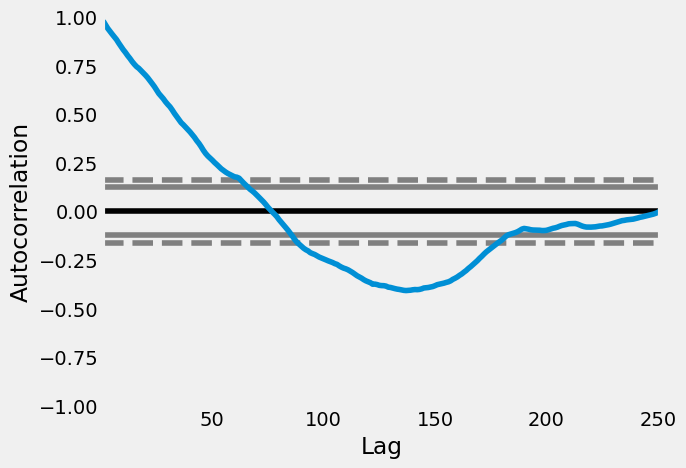

In [ ]:
pd.plotting.autocorrelation_plot(train_data["Close"])

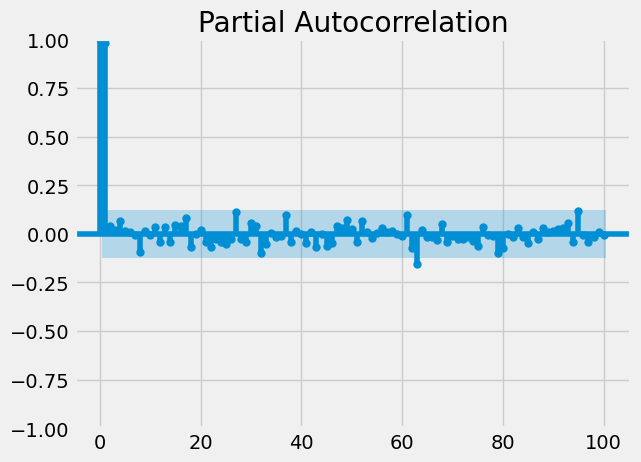

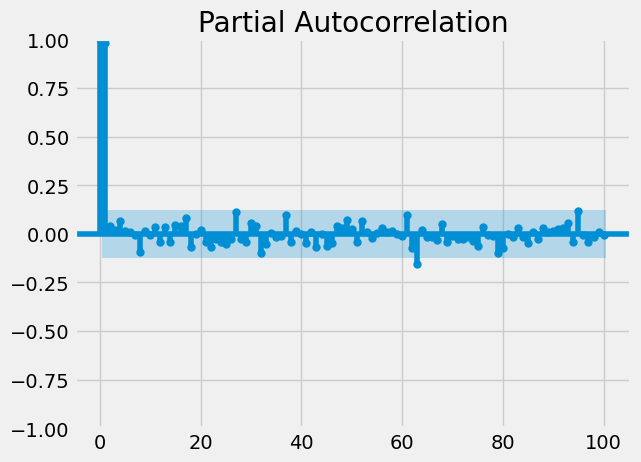

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_data["Close"], lags = 100)

In [ ]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data["Close"], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -584.896
Date:                Wed, 30 Oct 2024   AIC                           1185.792
Time:                        06:40:45   BIC                           1213.963
Sample:                             0   HQIC                          1197.130
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5175      0.059     -8.815      0.000      -0.633      -0.402
ar.L2         -0.9695      0.091    -10.700      0.000      -1.147      -0.792
ar.L3         -0.0934      0.109     -0.858      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions = model_fit.predict()
print(predictions)

0        0.000000
1      125.299988
2      127.528871
3      128.534591
4      130.166053
          ...    
246    167.581575
247    164.062702
248    163.772030
249    167.912391
250    168.601040
Name: predicted_mean, Length: 251, dtype: float64


In [ ]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(train_data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                               GOOG   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -570.742
Date:                            Wed, 30 Oct 2024   AIC                           1171.485
Time:                                    06:42:13   BIC                           1223.569
Sample:                                         0   HQIC                          1192.475
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5396      0.091      5.953      0.000       0.362       0.717
ar.L2         -0.8949      0.098   

In [ ]:
predictions = model.predict(len(train_data), len(data)+10)
print(predictions)

251    172.165145
252    173.281221
253    172.476919
254    171.447007
255    171.190816
256    172.301542
257    173.236066
258    173.062333
259    173.005060
260    172.242075
261    171.532774
Name: predicted_mean, dtype: float64


<Axes: >

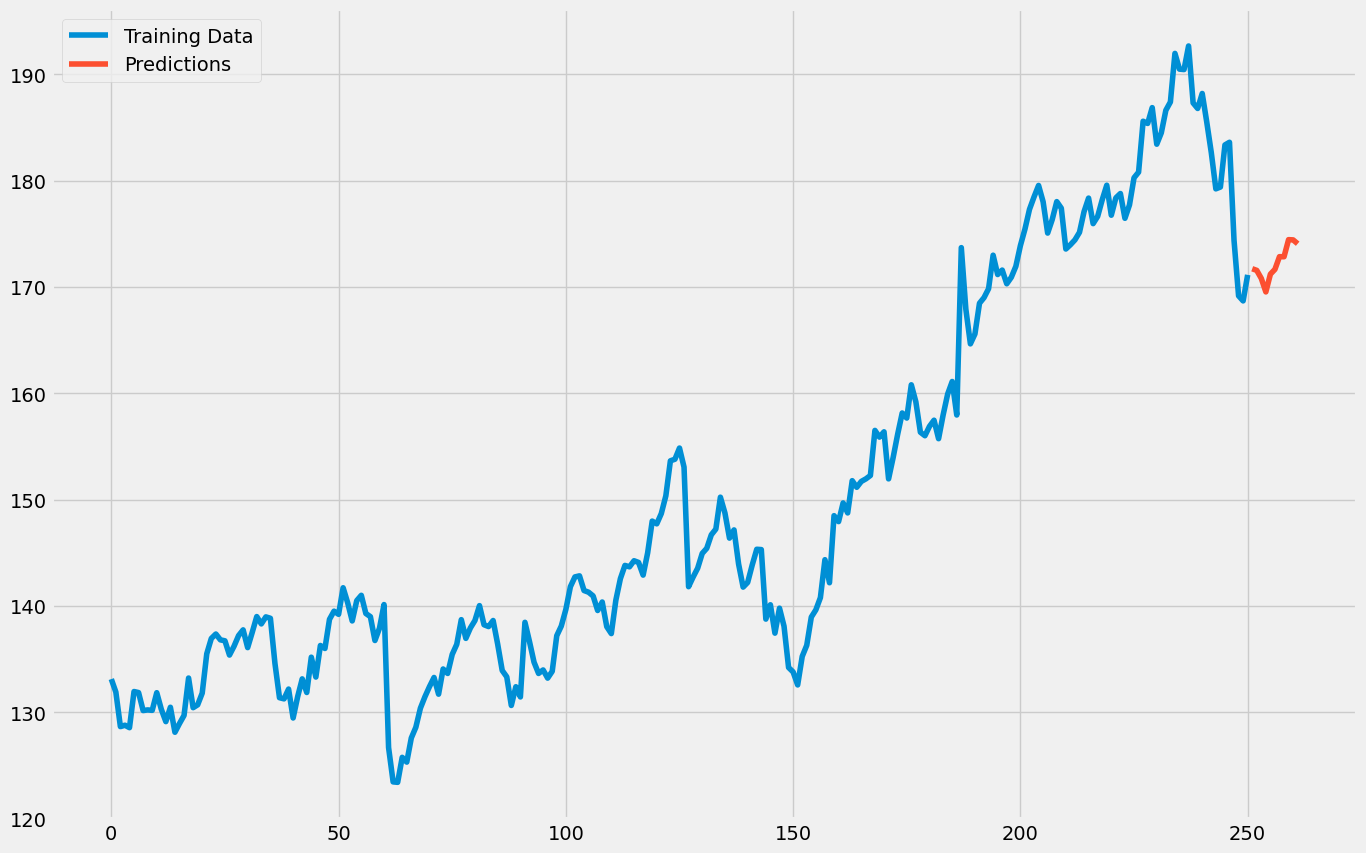

In [ ]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")